In [156]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge 12 months of sales data into one 

In [157]:
files = [file for file in os.listdir('./Sales_Data')]

In [158]:
all_months_data = pd.DataFrame()

In [159]:
for file in files:
    pf = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, pf])

In [160]:
# all_months_data.to_csv("all_data.csv", index=False)

In [161]:
all_data = pd.read_csv("./all_data.csv")
all_data = all_data.dropna()

In [162]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up data 

#### Find 'Or' and delete it 

In [163]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']

#### Convert coluns to correct type

In [164]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"] =pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns 

#### Task #2: Add month column 

In [165]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')

#### Task 3: Add sales column 

In [166]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

#### Task 4: Add a city column 

In [167]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x : x.split(',')[1])

### Question 1: What was the best month for sales? How much was earned that month? 

In [168]:
results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


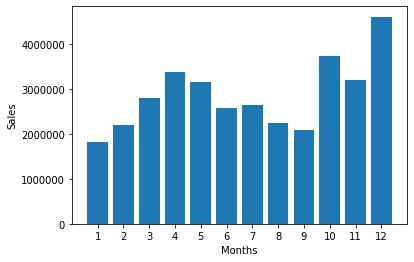

In [169]:

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

The month with the best sales was December with a total of $40613 dollars.

### What city had the highest number of sales? 

In [170]:
city_results = all_data.groupby("City").sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


In [176]:
cities = [city for city, df in all_data.groupby("City")]

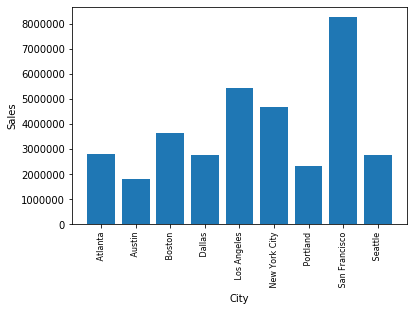

In [177]:
plt.bar(cities, city_results["Sales"])
plt.xticks(cities, rotation="vertical", size=8)
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? 

In [178]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])

In [183]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

In [184]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


In [185]:
hours = [hour for hour, df in all_data.groupby('Hour')]

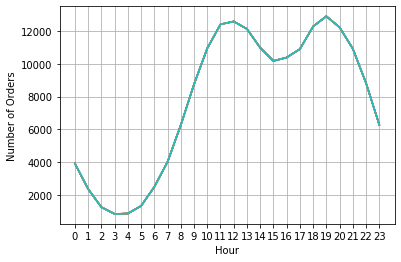

In [190]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

Ads should be displayed to maximize the number of purchases at 11pm or 7am

### Question 4: What products are most often sold together? 

In [193]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


In [204]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

/Users/bryanalvarenga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [205]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [209]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question 5: What product sold the most? why do you think it sold the most? 

In [210]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


In [230]:
prod_most_sold = all_data.groupby("Product")
quantity_ordered = prod_most_sold.sum()['Quantity Ordered']

In [214]:
products = [product for product, df in all_data.groupby("Product")]

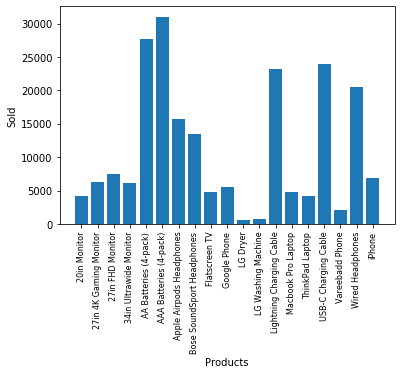

In [231]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size=8)
plt.xlabel("Products")
plt.ylabel("Sold")
plt.show()

The product that was most sold was the "AAA Batteries". 